Analyzing Nintendo and Xbox Game Sales.

Data Scraped and Compiled from the Following Wikipedia Pages:

https://en.wikipedia.org/wiki/List_of_best-selling_Nintendo_Switch_video_games \
https://en.wikipedia.org/wiki/List_of_best-selling_Xbox_video_games


In [11]:
import pandas as pd
import re 
import numpy as np
from pathlib import Path
import sqlite3 
from pandas.io.html import read_html
import seaborn as sns
import matplotlib.pyplot as plt
url_nintendo = 'https://en.wikipedia.org/wiki/List_of_best-selling_Nintendo_Switch_video_games'
url_xbox = 'https://en.wikipedia.org/wiki/List_of_best-selling_Xbox_video_games'

In [89]:
switch_wiki = read_html(url_nintendo, attrs={'class':'wikitable'})
print('Extracted {num} wikitables'.format(num=len(switch_wiki)))

Extracted 1 wikitables


In [90]:
switch_wiki[0].head(3)

,Title,Copies sold,As of,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Mario Kart 8 Deluxe,57.01 million[4],"September 30, 2023","April 28, 2017",Kart racing,Nintendo EPD,Nintendo
1,Animal Crossing: New Horizons,43.38 million[4],"September 30, 2023","March 20, 2020",Social simulation,Nintendo EPD,Nintendo
2,Super Smash Bros. Ultimate,32.44 million[4],"September 30, 2023","December 7, 2018",Fighting,Bandai Namco StudiosSora Ltd.,Nintendo


In [91]:
nintendo_switch = switch_wiki[0]
nintendo_switch.dtypes

Title              object
Copies sold        object
As of              object
Release date[a]    object
Genre(s)           object
Developer(s)       object
Publisher(s)       object
dtype: object

In [92]:
#Data Cleansing
for column in nintendo_switch.columns:
    nintendo_switch[column] = nintendo_switch[column].str.replace(r"\(.*\)", "", regex=True)
    nintendo_switch[column] = nintendo_switch[column].str.replace(r"\[.*\]", "", regex=True)
    nintendo_switch[column] = nintendo_switch[column].str.replace(r"million", "")

In [93]:
nintendo_switch.head(9)

,Title,Copies sold,As of,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Mario Kart 8 Deluxe,57.01,"September 30, 2023","April 28, 2017",Kart racing,Nintendo EPD,Nintendo
1,Animal Crossing: New Horizons,43.38,"September 30, 2023","March 20, 2020",Social simulation,Nintendo EPD,Nintendo
2,Super Smash Bros. Ultimate,32.44,"September 30, 2023","December 7, 2018",Fighting,Bandai Namco StudiosSora Ltd.,Nintendo
3,The Legend of Zelda: Breath of the Wild,31.15,"September 30, 2023","March 3, 2017",Action-adventure,Nintendo EPD,Nintendo
4,Super Mario Odyssey,26.95,"September 30, 2023","October 27, 2017",Platformer,Nintendo EPD,Nintendo
5,Pokémon Sword and Shield,26.02,"September 30, 2023","November 15, 2019",Role-playing,Game Freak,The Pokémon CompanyNintendo
6,Pokémon Scarlet and Violet,23.23,"September 30, 2023","November 18, 2022",Role-playing,Game Freak,The Pokémon CompanyNintendo
7,Super Mario Party,19.66,"September 30, 2023","October 5, 2018",Party,NDcube,Nintendo
8,The Legend of Zelda: Tears of the Kingdom,19.50,"September 30, 2023","May 12, 2023",Action-adventure,Nintendo EPD,Nintendo


In [94]:
#rename columns
nintendo_switch.rename(columns={'Release date[a]': 'Release_date'}, inplace=True)
nintendo_switch.rename(columns={'Genre(s)': 'Genre'}, inplace=True)
nintendo_switch.rename(columns={'Developer(s)': 'Developer'}, inplace=True)
nintendo_switch.rename(columns={'Publisher(s)': 'Publisher'}, inplace=True)
nintendo_switch.rename(columns={'As of': 'Latest_report'}, inplace=True)
nintendo_switch.rename(columns={'Copies sold': 'Copies_sold_millions'}, inplace=True)

In [95]:
nintendo_switch.head(9)

,Title,Copies_sold_millions,Latest_report,Release_date,Genre,Developer,Publisher
0,Mario Kart 8 Deluxe,57.01,"September 30, 2023","April 28, 2017",Kart racing,Nintendo EPD,Nintendo
1,Animal Crossing: New Horizons,43.38,"September 30, 2023","March 20, 2020",Social simulation,Nintendo EPD,Nintendo
2,Super Smash Bros. Ultimate,32.44,"September 30, 2023","December 7, 2018",Fighting,Bandai Namco StudiosSora Ltd.,Nintendo
3,The Legend of Zelda: Breath of the Wild,31.15,"September 30, 2023","March 3, 2017",Action-adventure,Nintendo EPD,Nintendo
4,Super Mario Odyssey,26.95,"September 30, 2023","October 27, 2017",Platformer,Nintendo EPD,Nintendo
5,Pokémon Sword and Shield,26.02,"September 30, 2023","November 15, 2019",Role-playing,Game Freak,The Pokémon CompanyNintendo
6,Pokémon Scarlet and Violet,23.23,"September 30, 2023","November 18, 2022",Role-playing,Game Freak,The Pokémon CompanyNintendo
7,Super Mario Party,19.66,"September 30, 2023","October 5, 2018",Party,NDcube,Nintendo
8,The Legend of Zelda: Tears of the Kingdom,19.50,"September 30, 2023","May 12, 2023",Action-adventure,Nintendo EPD,Nintendo


In [96]:
nintendo_switch['Copies_sold_millions'] = nintendo_switch['Copies_sold_millions'].astype(float)

In [97]:
mario_set = nintendo_switch[nintendo_switch['Title'].str.contains("Mario")]
mario_set

,Title,Copies_sold_millions,Latest_report,Release_date,Genre,Developer,Publisher
0,Mario Kart 8 Deluxe,57.01,"September 30, 2023","April 28, 2017",Kart racing,Nintendo EPD,Nintendo
4,Super Mario Odyssey,26.95,"September 30, 2023","October 27, 2017",Platformer,Nintendo EPD,Nintendo
7,Super Mario Party,19.66,"September 30, 2023","October 5, 2018",Party,NDcube,Nintendo
9,New Super Mario Bros. U Deluxe,16.70,"September 30, 2023","January 11, 2019",Platformer,Nintendo EPD,Nintendo
16,Super Mario 3D World + Bowser's Fury,12.58,"September 30, 2023","February 12, 2021",Platformer,Nintendo EPD,Nintendo
17,Mario Party Superstars,11.44,"September 30, 2023","October 29, 2021",Party,NDcube,Nintendo
20,Super Mario 3D All-Stars,9.07,"December 31, 2021","September 18, 2020",Platformercompilation,Nintendo,Nintendo
21,Super Mario Maker 2,8.42,"December 31, 2022","June 28, 2019",PlatformerLevel editor,Nintendo EPD,Nintendo
29,Mario Tennis Aces,4.50,"December 31, 2022","June 22, 2018",Sports,Camelot Software Planning,Nintendo
31,Super Mario Bros. Wonder,4.30,"October 29, 2023","October 20, 2023",Platformer,Nintendo EPD,Nintendo


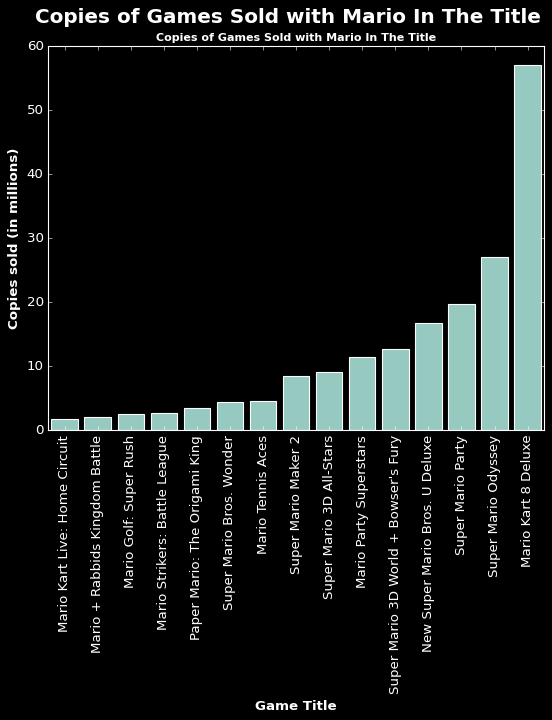

In [98]:
plt.style.use('dark_background')
sns.barplot(mario_set, x="Title", y="Copies_sold_millions")
#sns.barplot( mario_set['Copies_sold_millions'], edgecolor= 'white')
plt.suptitle('Copies of Games Sold with Mario In The Title', weight='bold').set_fontsize(18)
plt.title('Copies of Games Sold with Mario In The Title', weight='bold').set_fontsize(10)
plt.xlabel('Game Title', weight = 'bold', color = 'white')
plt.ylabel('Copies sold (in millions)', weight = 'bold', color = 'white')
plt.gca().invert_xaxis()
plt.xticks(rotation=90, color = 'white')
plt.yticks(color = 'white')
plt.show()

In [99]:
#Now, let's scrape information for Xbox games
xbox_wiki = read_html(url_xbox, attrs={'class':'wikitable'})
print('Extracted {num} wikitables'.format(num=len(switch_wiki)))

Extracted 1 wikitables


In [100]:
xbox_wiki[0].head(3)

,No.,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,1,Halo 2,8.46 million[1],"November 9, 2004",First-person shooter,Bungie,Microsoft Game Studios
1,2,Halo: Combat Evolved,5 million[2],"November 15, 2001",First-person shooter,Bungie,Microsoft Game Studios
2,3,Sneak King,3.2 million[3],"November 19, 2006",Stealth-actionadvergame,Blitz Games Studios,King Games


In [101]:
#Data Cleansing
xbox_set = xbox_wiki[0]
xbox_set.dtypes

No.                 int64
Game               object
Copies sold        object
Release date[a]    object
Genre(s)           object
Developer(s)       object
Publisher(s)       object
dtype: object

In [102]:
#rename columns
xbox_set.rename(columns={'Release date[a]': 'Release_date'}, inplace=True)
xbox_set.rename(columns={'Genre(s)': 'Genre'}, inplace=True)
xbox_set.rename(columns={'Developer(s)': 'Developer'}, inplace=True)
xbox_set.rename(columns={'Publisher(s)': 'Publisher'}, inplace=True)
xbox_set.rename(columns={'As of': 'Latest_report'}, inplace=True)
xbox_set.rename(columns={'Copies sold': 'Copies_sold_millions'}, inplace=True)
xbox_set.rename(columns={'Game': 'Title'}, inplace=True)

del xbox_set['No.']

In [103]:
xbox_set['Copies_sold_millions'] = xbox_set['Copies_sold_millions'].str.replace(r"\(.*\)", "")
xbox_set['Copies_sold_millions'] = xbox_set['Copies_sold_millions'].str.replace(r"\[.*\]", "")
xbox_set['Copies_sold_millions'] = xbox_set['Copies_sold_millions'].str.replace(r"million", "")

In [108]:
xbox_set['Copies_sold_millions'] = xbox_set['Copies_sold_millions'].str.replace(r"\[.*\]", "",regex=True)
xbox_set['Copies_sold_millions'] = xbox_set['Copies_sold_millions'].astype(float)
xbox_set.head(3)

,Title,Copies_sold_millions,Release_date,Genre,Developer,Publisher
0,Halo 2,8.46,"November 9, 2004",First-person shooter,Bungie,Microsoft Game Studios
1,Halo: Combat Evolved,5.00,"November 15, 2001",First-person shooter,Bungie,Microsoft Game Studios
2,Sneak King,3.20,"November 19, 2006",Stealth-actionadvergame,Blitz Games Studios,King Games


In [109]:
xbox_set.dtypes

Title                    object
Copies_sold_millions    float64
Release_date             object
Genre                    object
Developer                object
Publisher                object
dtype: object

In [106]:
del nintendo_switch['Latest_report']

In [110]:
nintendo_switch.dtypes

Title                    object
Copies_sold_millions    float64
Release_date             object
Genre                    object
Developer                object
Publisher                object
dtype: object

In [111]:
#Add column "Type" to both dataframes
xbox_set['Type'] = 'Xbox'
nintendo_switch['Type'] = 'Nintendo'
nintendo_switch.head(3)

,Title,Copies_sold_millions,Release_date,Genre,Developer,Publisher,Type
0,Mario Kart 8 Deluxe,57.01,"April 28, 2017",Kart racing,Nintendo EPD,Nintendo,Nintendo
1,Animal Crossing: New Horizons,43.38,"March 20, 2020",Social simulation,Nintendo EPD,Nintendo,Nintendo
2,Super Smash Bros. Ultimate,32.44,"December 7, 2018",Fighting,Bandai Namco StudiosSora Ltd.,Nintendo,Nintendo


In [118]:
xbox_set['Release_date']=pd.to_datetime(xbox_set['Release_date'])
nintendo_switch['Release_date']=pd.to_datetime(nintendo_switch['Release_date'])
nintendo_switch.head(3)

,Title,Copies_sold_millions,Release_date,Genre,Developer,Publisher,Type
0,Mario Kart 8 Deluxe,57.01,2017-04-28,Kart racing,Nintendo EPD,Nintendo,Nintendo
1,Animal Crossing: New Horizons,43.38,2020-03-20,Social simulation,Nintendo EPD,Nintendo,Nintendo
2,Super Smash Bros. Ultimate,32.44,2018-12-07,Fighting,Bandai Namco StudiosSora Ltd.,Nintendo,Nintendo


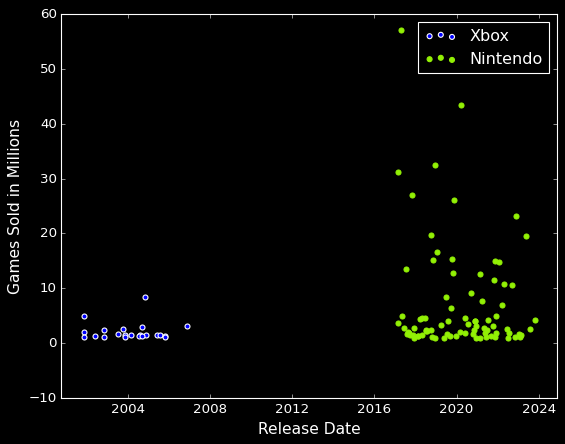

In [139]:
plt.xlabel("Release Date", fontsize=14)
plt.ylabel('Games Sold in Millions' , fontsize=14)
plt.scatter(xbox_set['Release_date'],xbox_set['Copies_sold_millions'], label='Xbox')
plt.scatter(nintendo_switch['Release_date'],nintendo_switch['Copies_sold_millions'], color='#92f005', label='Nintendo')
plt.legend(["Xbox" , "Nintendo"])
plt.show()